In [1]:
import matplotlib.pyplot as plt       # matplotlib.pyplot importing
import numpy as np                    # Numpy importing
import pandas as pd                   # Pandas importing
from scipy.stats import pearsonr      # Used for the "earsonr(df['TV'],df['Sales'])[0])", Scipy personr covariance
import statsmodels.api as sm          # statsmodels.api importing
import statsmodels.formula.api as smf # statsmodels.formula.api importing
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
#------------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


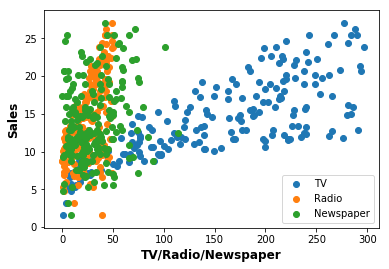

In [2]:
#pd.set_option('display.max_rows',10)
#pd.set_option('display.width',100)
df=pd.read_csv('Advertising.csv', sep=',', usecols=range(1,5)) # Reading cvs file omiting first column
#df=df.dropna()            # Cleaning dataset from any row with at least one column with "NaN" values, this is optional

yVariable=df['Sales']      # Selecting our response variable
x1Variable=df['TV']        # Selecting our predictor variables
x2Variable=df['Radio']     # Selecting our predictor variables
x3Variable=df['Newspaper'] # Selecting our predictor variables

plt.scatter(x1Variable,yVariable,label='TV')            # Plotting graph
plt.scatter(x2Variable,yVariable,label='Radio')         # Plotting graph
plt.scatter(x3Variable,yVariable,label='Newspaper')     # Plotting graph
plt.xlabel('TV/Radio/Newspaper',size=12, fontweight='semibold')     # Setting x axis label with some properties
plt.ylabel('Sales',size=12, fontweight='semibold')                  # Setting x axis label with some properties
plt.legend()                                                        # Plotting legend
df.head()
#plt.show()                                                          # Showing in graph command, Printing result

In [3]:
My_vars= df.iloc[:,0:3]
correl=My_vars.corr()
print(correl)

                 TV     Radio  Newspaper
TV         1.000000  0.054809   0.056648
Radio      0.054809  1.000000   0.354104
Newspaper  0.056648  0.354104   1.000000


In [4]:
#-----------------REGRESSION ANALYSIS "statsmodels.formula.api Method"---------------------------------------------------------
linear_regression=smf.ols(formula='Sales ~ TV+ Radio + Newspaper',data=df)
fitted_model=linear_regression.fit()
print(fitted_model.summary())   #Printing the whole summary
print(fitted_model.params)      #Printing just equation parameters

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 14 Oct 2018   Prob (F-statistic):           1.58e-96
Time:                        13:55:55   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

In [5]:
#-----------------REGRESSION ANALYSIS "scikit-learn approach Method"-----------------------------------------------------------
xPredictors = df.iloc[:,0:3] # Selecting predictor variables
yResponse = df['Sales']      # Selecting response variables
#------------------------------------------------------------------------------------------------------------------------------
My_regression = linear_model.LinearRegression(normalize=False,fit_intercept=True)
standardization = StandardScaler()
Stand_coef_linear_reg = make_pipeline(standardization, My_regression) 
#------------------------------------------------------------------------------------------------------------------------------
My_regression.fit(xPredictors,yResponse)
print ("Slopes: TV, Radio, Newspaper", My_regression.coef_)  #Coefficient Printout
print ("Intercept", My_regression.intercept_)                #Intercept Printout

Slopes: TV, Radio, Newspaper [ 0.04576465  0.18853002 -0.00103749]
Intercept 2.9388893694594085


### The regression equation is:
### y = 2.938889 + 0.045765 * TV + 0.188530 * Radio - 0.001037 * Newspaper

## Not READY

In [15]:
#-----------------REGRESSION ANALYSIS "Gradient Descent"-----------------------------------------------------------
###  xVariable=df['TV']  
###  X = xVariable.values.reshape((observations, 1))
#My_vars= df.iloc[:,0:3]
observations = len(df)
variables = df.columns
standardization = StandardScaler()
Xst = standardization.fit_transform(xPredictors)
original_means = standardization.mean_
originanal_stds = standardization.var_**.5  #originanal_stds = standardization.std_  
Xst = np.column_stack((Xst,np.ones(observations)))
y = df['Sales'].values

import random
def random_w( p ):
    return np.array([np.random.normal() for j in range(p)])
def hypothesis(X,w):
    return np.dot(X,w)
def loss(X,w,y):
    return hypothesis(X,w) - y
def squared_loss(X,w,y):
    return loss(X,w,y)**2
def gradient(X,w,y):
    gradients = list()
    n = float(len( y ))
    for j in range(len(w)):
        gradients.append(np.sum(loss(X,w,y) * X[:,j]) / n)
    return gradients
def update(X,w,y, alpha=0.01):
    return [t - alpha*g for t, g in zip(w, gradient(X,w,y))]
def optimize(X,y, alpha=0.01, eta = 10**-12, iterations = 1000):
    w = random_w(X.shape[1])
    path = list()
    for k in range(iterations):
        SSL = np.sum(squared_loss(X,w,y))
        new_w = update(X,w,y, alpha=alpha)
        new_SSL = np.sum(squared_loss(X,new_w,y))
        w = new_w
        if k>=5 and (new_SSL - SSL <= eta and new_SSL - SSL >= -eta):
            path.append(new_SSL)
            return w, path
    if k % (iterations / 20) == 0:
        path.append(new_SSL)
    return w, path
alpha = 0.02
w, path = optimize(Xst, y, alpha, eta = 10**-12,iterations = 20000)
#print ("These are our final standardized coefficients: " + ','.join(map(lambda x: "%0.4f" % x, w)))

In [16]:
unstandardized_betas = w[:-1] / originanal_stds
unstandardized_bias = w[-1]-np.sum((original_means /originanal_stds) * w[:-1])
print ('%8s: %8.4f' % ('bias', unstandardized_bias))
for beta,varname in zip(unstandardized_betas, variables):
    print ('%8s: %8.4f' % (varname, beta))

    bias:   2.9389
      TV:   0.0458
   Radio:   0.1885
Newspaper:  -0.0010
